<a href="https://colab.research.google.com/github/bforoura/GenAI/blob/main/Module8/hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

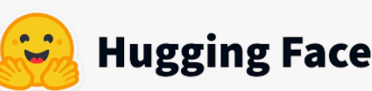


 * A company in the field of Natural Language Processing (**NLP**) and Machine Learning (**ML**).

 * It has partnerships with Google, Facebook AI Research (FAIR), Microsoft, OpenAI, etc.

* It provides open-source tools access to cutting-edge AI technologies, particularly **transformer models**.
  
* Its AI libraries provide access to **pre-trained transformer models**, such as **BERT**, **GPT**, and **RoBERTa**, and allows users to **fine-tune** these models for their own tasks.
    
* The **Hugging Face Model Hub** is a repository for **pre-trained** models for thousands of models for NLP as well as computer vision, audio processing, etc.
    
* You can deploy their models via their **API tokens**.


* **HF Models**:
> * Text classification
> * Text Generation
> * Text Summarization
> * Question Answering
> * Text-to-Image Generation

    

# **Creating HF API Tokens**


* Create a Hugging Face Account (if you don't have one already)

* Once you're logged in to your Hugging Face account, go to your account settings page by clicking on your profile picture in the top-right corner of the page and selecting Settings.

* In the **Access Tokens** section, click New token to create a new token.

* Choose a name for the token (e.g., "colab_access") and set the scope to read (default is fine unless you need to push models).

* Copy the generated token.

* Once you have the API token, you can either **input it directly in your Colab notebook** or set it as an environment variable.


# **Google Colab's Secret Management System**

* First, save your Hugging Face API Token as an **environment variable**

> * import os
> * os.environ["HF_TOKEN"] = "your_hugging_face_api_token_here"


* Then, login using the token:
> * from **huggingface_hub** import **login**
> * token = os.getenv("HF_TOKEN")
> * **login**(token=**token**)



# **Zero-Shot Text Classification**


* Model: facebook/bart-large-mnli
> * Model Type: BART (Bidirectional and Auto-Regressive Transformers)
> * Model Size: 406 million parameters
> * **Architecture**: BART combines a bidirectional encoder (like BERT) with an autoregressive decoder (like GPT), enabling it to perform a variety of tasks such as classification, summarization, and text generation.


## **Example: Classifying Product Reviews into Sentiments.**

---



In [ ]:
from transformers import pipeline

# Load zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Product review text
text = "This phone has an amazing camera, but the battery life could be better."

# Define candidate labels (sentiment labels)
candidate_labels = ["positive", "negative", "neutral"]

# Run zero-shot classification
result = classifier(text, candidate_labels)

print(result)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'sequence': 'This phone has an amazing camera, but the battery life could be better.', 'labels': ['negative', 'positive', 'neutral'], 'scores': [0.9364539980888367, 0.049501337110996246, 0.014044657349586487]}


# **Text-to-Image Generation**


* Model: CompVis/stable-diffusion-v-1-4-original
> * Model Type: Stable Diffusion
> * Model Size: 890 million parameters
> * **Architecture**: Stable Diffusion uses Latent Diffusion Models (LDMs), which combine Variational Autoencoders (VAEs) with U-Net for efficient image generation in a compressed latent space.

* The model generates images based on a text prompt by encoding the prompt into a latent space and then refining random noise into an image that matches the description using a denoising process.

### **Example: Generating an Image of a Fantasy Landscape**


In [ ]:
# Install necessary libraries
!pip install huggingface_hub diffusers transformers

from diffusers import StableDiffusionPipeline
from google.colab import files

# Load the Stable Diffusion model from Hugging Face
generator = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Text prompt: fantasy landscape
text_prompt = "a mystical forest with glowing mushrooms and a sparkling river"

# Generate an image
image = generator(text_prompt).images[0]

# Save the image to a file (e.g., "generated_image.png")
image_path = "/content/generated_image.png"
image.save(image_path)


# Create a downloadable link for the image
files.download(image_path)



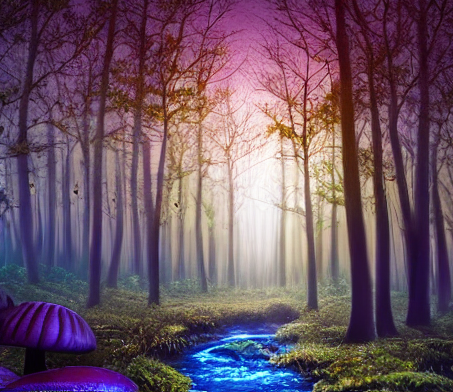

# **Conversational AI**

* Model: microsoft/DialoGPT-medium
> * Model Type: DialoGPT (a variant of GPT-2)
> * Model Size: 345 million parameters
> * **Architecture**: DialoGPT uses the GPT-2 architecture, fine-tuned specifically for generating conversational text. It can respond contextually to multiple turns of dialogue.


* The model generates responses based on previous dialogue, using a causal language model to predict the next word in a sequence.

* By maintaining the conversation history, it can generate coherent and relevant responses.


## **Example: Simple Chatbot Conversation**

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Load pre-trained model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-medium")
model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-medium")

# Optionally move model to GPU for faster processing (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Start conversation with the bot
chat_history_ids = None
user_input = "Hey there! How's the weather?"

# Encode the user input
new_user_input_ids = tokenizer.encode(user_input + tokenizer.eos_token, return_tensors='pt').to(device)

# Append new user input tokens to chat history
bot_input_ids = new_user_input_ids if chat_history_ids is None else torch.cat([chat_history_ids, new_user_input_ids], dim=-1)

# Generate response from the bot
chat_history_ids = model.generate(bot_input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

# Decode and print the bot's response
bot_response = tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)
print(bot_response)




tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/863M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


It's nice!


# **Text Summarization**


* Model: facebook/bart-large-cnn
> * Model Type: BART (Bidirectional and Auto-Regressive Transformers)
> * Model Size: 406 million parameters
> * **Architecture**: BART is a sequence-to-sequence model combining a bidirectional encoder and autoregressive decoder, making it effective for tasks like summarization.


* BART is pre-trained on a denoising autoencoding task and fine-tuned for summarization.

* It compresses input text into a smaller latent representation, which is then decoded into a concise summary.

### **Example: Summarizing a Scientific Article**

In [ ]:
from transformers import pipeline

# Load summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Sample long text (scientific article)
long_text = """
Deep learning has revolutionized the field of artificial intelligence (AI) in recent years, with remarkable advancements in areas such as
computer vision, natural language processing (NLP), and reinforcement learning. These advances are primarily due to the introduction
of deep neural networks, which are capable of learning complex patterns from large amounts of data. The key to deep learning's success
is its ability to automatically extract features from raw data, such as images or text, without the need for manual feature engineering.
"""

# Get the summary
summary = summarizer(long_text, max_length=50, min_length=25, do_sample=False)

print(summary[0]['summary_text'])

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Deep learning has revolutionized the field of artificial intelligence (AI) in recent years. The key to deep learning's success is its ability to automatically extract features from raw data.


# **Text Classification Using BERT**


* Model: bert-base-uncased
> * Model Type: BERT (Bidirectional Encoder Representations from Transformers)
> * Model Size: 110 million parameters
> * **Architecture**: BERT uses bidirectional self-attention, allowing it to understand the context from both sides of a word, making it highly effective for tasks like text classification.


* BERT is **pre-trained** using Masked Language Modeling (**MLM**) and Next Sentence Prediction (**NSP**) tasks.

* **Fine-tuning** BERT for specific tasks like text classification involves adding a classification layer on top of the model.


### **Example: BERT Text Classification for Sentiment Analysis.**

In [ ]:
from transformers import pipeline

# Load text classification pipeline
classifier = pipeline("text-classification", model="bert-base-uncased")

# Example text for classification
text = "I absolutely love this product! It works perfectly."

# Run text classification (e.g., sentiment analysis)
result = classifier(text)

print(result)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

[{'label': 'LABEL_0', 'score': 0.7297593951225281}]


# **Model Training and Fine-tuning on Custom Datasets**



* While pre-trained models are powerful, fine-tuning them on domain-specific datasets can improve performance for specific tasks.

* Steps:
> 1. Load Your Dataset using Hugging Face's datasets library.
> 2. Fine-tune the Model using the Trainer API to adapt the model to your custom task.



## **Example: Fine-tuning BERT on a Custom Dataset for Sentiment Analysis.**

In [ ]:
# Import necessary libraries
!pip install datasets transformers huggingface_hub diffusers

# Step 1
from datasets import load_dataset
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from transformers import BertTokenizer
from huggingface_hub import login
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Load the IMDb dataset
dataset = load_dataset("imdb")


# Step 3: Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


# Step 4: Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

train_dataset = dataset["train"].map(tokenize_function, batched=True)
eval_dataset = dataset["test"].map(tokenize_function, batched=True)


# Step 5: Load the pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


# Step 6: Set up the training arguments
training_args = TrainingArguments(
    output_dir='./results',               # Output directory to store results
    evaluation_strategy="epoch",          # Evaluation after each epoch
    learning_rate=2e-5,                   # Learning rate
    per_device_train_batch_size=16,       # Batch size for training
    per_device_eval_batch_size=64,        # Batch size for evaluation
    num_train_epochs=3,                   # Number of training epochs
    report_to=[]                          # Disable WandB logging
)


# Step 7: Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
)


# Step 8: Train the model
trainer.train()


# 9. Evaluate the model on the test dataset
eval_predictions = trainer.predict(eval_dataset)
predicted_labels = eval_predictions.predictions.argmax(axis=-1)
true_labels = eval_dataset['label']


# 10. Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


# 11. Show misclassified samples
misclassified_samples = []
for idx, (true_label, pred_label) in enumerate(zip(true_labels, predicted_labels)):
    if true_label != pred_label:
        misclassified_samples.append((eval_dataset['text'][idx], true_label, pred_label))

# Display misclassified examples (First 5)
print("Misclassified Examples:")
for sample in misclassified_samples[:5]:
    print(f"Text: {sample[0]}")
    print(f"True Label: {'Positive' if sample[1] == 1 else 'Negative'}")
    print(f"Predicted Label: {'Positive' if sample[2] == 1 else 'Negative'}\n")


# 12. Visualize confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


# Create a text classification pipeline
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Test the model with new reviews
new_reviews = [
    "What a fantastic movie, truly one of the best I've seen!",
    "This film was a waste of time, boring and slow."
]

# Get predictions for new reviews
predictions = classifier(new_reviews)

# Display the predictions
for review, prediction in zip(new_reviews, predictions):
    print(f"Review: {review}")
    print(f"Prediction: {'Positive' if prediction['label'] == 'LABEL_1' else 'Negative'}\n")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
